In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/clean_rates.csv', parse_dates=['Tarih'], index_col='Tarih')
df.head()

,Ömerli,Darlık,Elmalı,Terkos,Alibey,Büyükçekmece,Sazlıdere,Kazandere,Pabuçdere,Istrancalar
Tarih,,,,,,,,,,
2000-10-23,0.6526,0.7502,0.7898,0.7086,0.0,0.5214,0.5055,0.0575,0.0686,0.1110
2000-10-24,0.6597,0.7730,0.8172,0.7103,0.0,0.5214,0.5070,0.0575,0.0691,0.0772
2000-10-25,0.6633,0.7879,0.8267,0.7086,0.0,0.5197,0.5070,0.0575,0.0694,0.1056
2000-10-26,0.6626,0.7933,0.8281,0.7068,0.0,0.5179,0.5070,0.0575,0.0696,0.1142
2000-10-27,0.6605,0.7959,0.8281,0.7068,0.0,0.5161,0.5055,0.0575,0.0667,0.1140


In [3]:
cap_df = pd.read_csv('data/capacities.csv')
cap_df

,Ömerli,Darlık,Elmalı,Terkos,Alibey,Büyükçekmece,Sazlıdere,Kazandere,Pabuçdere,Istrancalar
0,235371000,107500000,9600000,162241000,34143000,148943000,88730000,17424000,58500000,6231000


<p style="background-image: linear-gradient(to right, #0D9276, #41b675)"> &nbsp </p>

#### 1. Dam capacity graph

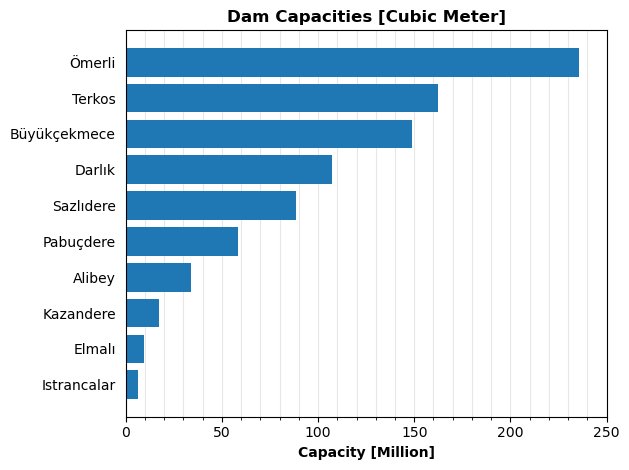

In [4]:
# Extract values
temp_df = cap_df.sort_values(by=0, axis=1)
names = temp_df.columns
values = temp_df.values[0]

# Create bar chart
plt.barh(names, values, zorder=2)

# Customize chart
plt.xticks(np.arange(0, 250_000_001, 50_000_000), np.arange(0, 251, 50))   # Set x axis values
plt.tick_params(axis='y', which='both', left=False)                        # Do not show y ticks
plt.minorticks_on()                                                        # Add minor ticks
plt.grid(axis='x', which='both', alpha=0.3, zorder=0)                      # Show vertical gridlines 

plt.xlabel('Capacity [Million]', fontweight='bold')
plt.title('Dam Capacities [Cubic Meter]', fontweight='bold')

plt.tight_layout()
plt.show()
del(temp_df, values, names)

<p style="background-image: linear-gradient(to right, #0D9276, #41b675)"> &nbsp </p>

#### 2. Annual average dam occupancy graph for 'Ömerli' and 'Sazlıdere'

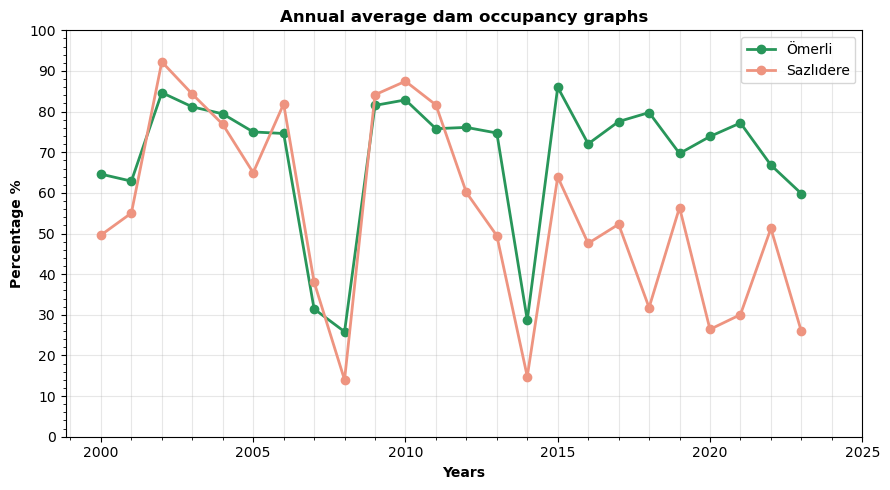

In [5]:
# Group by years and calculate the annual averages
yearly_groups = df.groupby(by=df.index.year)
means = yearly_groups.mean()

# Extract values
omerli = np.array(means['Ömerli'])
sazlidere = np.array(means['Sazlıdere'])
years = np.array(list(yearly_groups.groups.keys()))

# Create chart
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(years, omerli, color='#28965A', linewidth=2, marker='o', label='Ömerli')
ax.plot(years, sazlidere, color='#EE9480', linewidth=2, marker='o', label='Sazlıdere')

# Customize chart
ax.set_xticks(np.arange(2000, 2026, 5))                         # Set x axis values
ax.set_yticks(np.arange(0, 1.01, 0.1), np.arange(0, 101, 10))   # Set y axis values

ax.minorticks_on()
ax.xaxis.grid(which='both', alpha=0.3)
ax.yaxis.grid(which='major', alpha=0.3)

ax.set_xlabel('Years', fontweight='bold')
ax.set_ylabel('Percentage %', fontweight='bold')
plt.title('Annual average dam occupancy graphs', fontweight='bold')

plt.legend()
plt.tight_layout()
plt.show()
del(yearly_groups, means, omerli, sazlidere, years)

<p style="background-image: linear-gradient(to right, #0D9276, #41b675)"> &nbsp </p>

#### 3. Istanbul's average dam occupancy rate by years

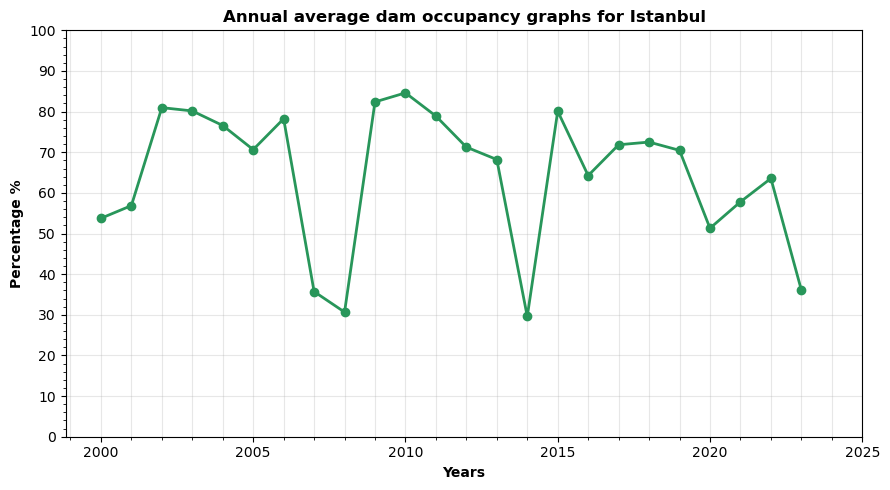

In [6]:
# Group by years and calculate the annual averages
yearly_groups = df.groupby(by=df.index.year)


# Calculate the overall occupancy from the ocupancy rate of each dam
ist_df = yearly_groups.mean() * cap_df.values                   # Multiply rows with their capacities
ist_df['Istanbul'] = ist_df.sum(axis=1)                         # Sum up all columns
ist_df['Istanbul'] = ist_df['Istanbul'] / cap_df.values.sum()   # Divide by total capacity
ist_df = ist_df[['Istanbul']]

# Extract values
istanbul = np.array(ist_df['Istanbul'])
years = np.array(list(yearly_groups.groups.keys()))

# Create chart
plt.figure(figsize=(9, 5))
plt.plot(years, istanbul, color='#28965A', linewidth=2, marker='o')

# Customize chart
plt.xticks(np.arange(2000, 2026, 5))                         # Set x axis values
plt.yticks(np.arange(0, 1.01, 0.1), np.arange(0, 101, 10))   # Set y axis values

plt.minorticks_on()
plt.gca().xaxis.grid(which='both', alpha=0.3)
plt.gca().yaxis.grid(which='major', alpha=0.3)

plt.xlabel('Years', fontweight='bold')
plt.ylabel('Percentage %', fontweight='bold')
plt.title('Annual average dam occupancy graphs for Istanbul', fontweight='bold')

plt.tight_layout()
plt.show()
del(yearly_groups, ist_df, istanbul, years)

<p style="background-image: linear-gradient(to right, #0D9276, #41b675)"> &nbsp </p>

#### 4. Istanbul's average dam occupancy rate in months by years

In [7]:
# Group by years and calculate the annual averages
groups = df.groupby([df.index.year, df.index.month]).mean()

# Calculate the overall occupancy from the ocupancy rate of each dam
ist_df = groups* cap_df.values                   # Multiply rows with their capacities
ist_df['Istanbul'] = ist_df.sum(axis=1)                         # Sum up all columns
ist_df['Istanbul'] = ist_df['Istanbul'] / cap_df.values.sum()   # Divide by total capacity
ist_df = ist_df[['Istanbul']]
ist_df = ist_df.unstack()


ist_df.dropna(thresh=6, inplace=True)
ist_df.fillna(axis=1, method='ffill', inplace=True)
# ist_df

ist_df.columns = ist_df.columns.get_level_values('Tarih')
ist_df.columns.name = 'Months'
ist_df.index.name = 'Years'
# ist_df.tail()

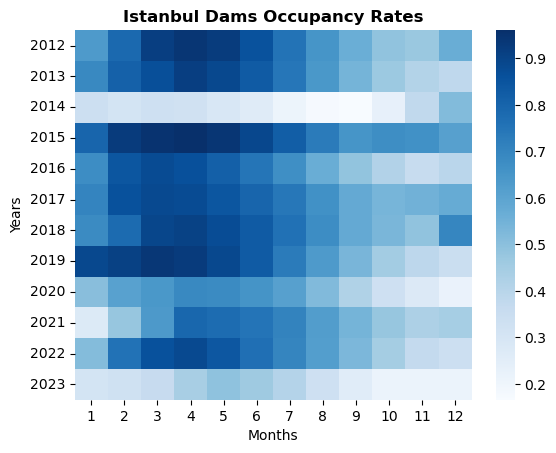

In [8]:
since = 2012
sns.heatmap(ist_df.loc[since:,:], cmap='Blues')
plt.title('Istanbul Dams Occupancy Rates', fontweight='bold')
plt.show()

<p style="background-image: linear-gradient(to right, #0D9276, #41b675)"> &nbsp </p>